### Домашнее задание по sklearn

В следующей ячейке мы импортируем библиотеки и фиксируем случайность. Значение сида(seed), а в нашем случае, 42, фиксирует случайность. Что это значит? 

После написания такой строчки, операции из ```numpy```, например, генерация датасета, будут все еще случайными,
но для всех запускающих этот код -- одинаковыми.

Пожалуйста, обращайте на него внимание во всех заданиях. Это требуется для проверки ваших решений и его удаление или изменение может повлечь за собой ошибки.

In [3]:
import sklearn
import numpy as np

np.random.seed(42)

# Задание 1

1. Получите выборку с помощью следующего вызова:
```
sklearn.datasets.make_moons(n_samples=1000, noise=0.5, random_state=10)
```
2. Разбейте выборку на `train` и `test` с помощью функции `train_test_split`. Через аргументы функции зафиксируйте `random_state=10` и `test_size=0.5`.

3. Обучите класс `GridSearchCV` на обучающей выборке. Переберите параметр `n_neighbors` от 1 до 20. Чтобы получить детерменированный результат, передайте в параметр `cv` объект класса `KFold(n_splits=5, random_state=10)`. Этот класс будет отвечать за разбиение выборки во время кросс-валидации.

Отправьте значение доли верных ответов(`accuracy`), которое получается, если применить обученный `GridSearchCV` к тестовой выбоке.

In [110]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

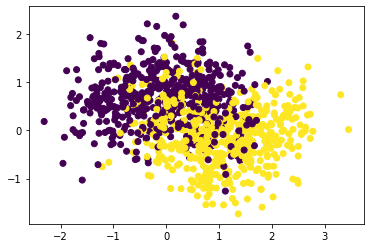

In [111]:
X, y = make_moons(n_samples=1000, noise=0.5, random_state=10)
plt.scatter(X[:, 0], X[:, 1], c=y)

Окей, ну, тут больше шум, больше сэмплов. Так даже интереснее!

Итак, random_state отвечает за перемешивание данных, то есть перемешиваться будут 10 раз.

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

In [135]:
grid_searcher = GridSearchCV(KNeighborsClassifier(),
                             param_grid={'n_neighbors': range(1, 21)},
                             cv = KFold(n_splits=5, random_state=10))

In [136]:
grid_searcher.fit(X_train, y_train);

In [137]:
best_predictions = grid_searcher.predict(X_test)

In [138]:
accuracy = accuracy_score(y_test, best_predictions)

In [139]:
# Небольшая проверка для себя
# В таких блоках мы сравниваем хэш вашего ответа и верного. 
# Таким образом вы поймете, правильный ли ваш ответ на данное задание

# Если ничего не вывелось, то ответ верный. Если ошибка, то проверьте это задание.
import hashlib

assert hashlib.sha256(str(round(accuracy, 2)).encode()).hexdigest() == '1e9d7c27c8bbc8ddf0055c93e064a62fa995d177fee28cc8fa949bc8a4db06f4'

In [134]:
# проверка, просто запустите ячейку


# Задание 2

Напишите функцию train_grid_search. Функция принимает выборку на вход. Она должна создать объект GridSearchCV, который переберет соседей от 1 до 20. Обучите GridSearchCV. Функция должна возвращать значение ключа mean_test_score у атрибута cv_results_ в классе GridSearchCV. Это поле содержит информацию о значении метрики для каждого параметра. В данном задании использовать KFold не требуется.

Код ниже строит изображение зависимости качества от количества соседей.

In [81]:
def train_grid_search(X, y):
    gread_searcher = GridSearchCV(KNeighborsClassifier(),
                                 param_grid = {'n_neighbors': range(1, 21)})
    gread_searcher.fit(X, y)
    return gread_searcher.cv_results_['mean_test_score']

In [82]:
X, y = datasets.make_moons(n_samples=1000, noise=0.5, random_state=10)
test_score = train_grid_search(X, y)
test_score

array([0.716, 0.734, 0.762, 0.762, 0.765, 0.766, 0.78 , 0.774, 0.782,
       0.788, 0.784, 0.789, 0.778, 0.785, 0.78 , 0.781, 0.792, 0.792,
       0.794, 0.793])

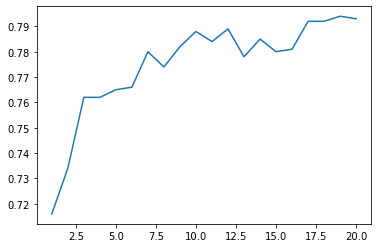

In [83]:
# аккуратно, не меняйте random_state
X, y = make_moons(n_samples=1000, noise=0.5, random_state=10)
test_score = train_grid_search(X, y)

# небольшая проверка: если не выдалась ошибка, то можете продолжать
assert (type(test_score) == np.ndarray), 'Переменная test_score должна иметь тип np.array()'
assert (len(test_score) == 20), 'Переменная test_score должна иметь 20 значений (по 1 для каждого кол-ва соседей)'

from matplotlib import pyplot as plt
plt.plot(np.arange(1, 21), test_score)

# проверяться будет переменная ```test_score```

In [84]:
# проверка номер 1, просто запустите ячейку

# your code here


In [85]:
# проверка номер 2, запускайте


## Задание 3

Загрузим данные:

In [86]:
!pip install python-mnist

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [87]:
from mnist import MNIST
from matplotlib import pyplot as plt
import numpy as np
mndata = MNIST('', gz=True)
images, labels = mndata.load_training()

# Далее мы берем только 5000 картинок и меток, чтобы не ждать обучения слишком долго:
images, labels = np.array(images)[:5000, :], np.array(labels)[:5000]

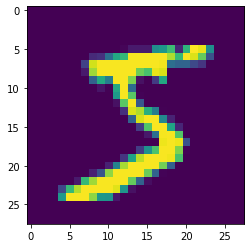

In [102]:
# Так вы можете посмотреть на данные. Например, это картинка номер 0. Можете посмотреть на любую другую!
plt.imshow(images[0].reshape(28, 28))
plt.show()

In [93]:
labels[5]

2

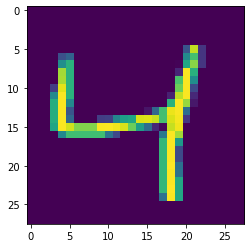

In [90]:
plt.imshow(images[2].reshape(28, 28))
plt.show()

В этом задании вы будете работать с классическим датасетом MNIST. Код выше загрузил данные в переменные images и labels. Обучите knn с 30 ближайшими соседями. Предварительно разбейте выборку на train и test в соотношении 80/20 и ```random_state=10```. Какой `accuracy` вы получаете на тестовой выборке? Ответ округлите до 3 знаков после запятой.

In [96]:
knn = KNeighborsClassifier(n_neighbors=30)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=10)

In [97]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [98]:
predictions = knn.predict(X_test)

In [99]:
accuracy_mnist = accuracy_score(y_test, predictions)

0.897

После получения ответа закомментируйте код в предыдущей ячейке и оставьте только строчку

```accuracy_mnist = x.xxx```

In [100]:
# Небольшая проверка для себя
import hashlib

assert hashlib.sha256(str(accuracy_mnist).encode()).hexdigest() == 'c29699d04c899bb3ddb5bd406ee08397c32b1e1c5c7a8b024f95d815b9556394'

In [101]:
# проверка, просто запустите ячейку


Не забудьте выполнить все ячейкеи, а затем нажать Validate перед отправкой!

# Задание 4 (неоцениваемое)

Найдите примеры, которые были классифицированы не правильно. Найдите и визуализируйте 5 соседей неправильных предсказаний у любого ошибочного примера. Найти соседей точки можно с помощью метода kneighbors.  Почему они были классифицированы неправильно?

# Примеры из лекции

Возьмем стандартный датасет c помощью функции load_boston. Датасет содержит информацию о ценах на квартиры и какие-то параметры квартиры: близость к реке, криминогенная обстановка в районе и т.д.

In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Прочитать описание датасета можно выполнив строчку: print(data['DESCR'])

In [3]:
X, y = data['data'], data['target']

In [4]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Price')

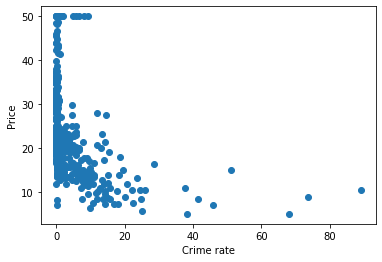

In [5]:
plt.scatter(X[:, 0], y)
plt.xlabel('Crime rate')
plt.ylabel('Price')

Пример для GridSearchCV

In [7]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_searcher = GridSearchCV(KNeighborsRegressor(),
                             param_grid={'n_neighbors': range(1, 40, 2),
                                         'weights': ['uniform', 'distance'],
                                         'p': [1, 2, 3]},
                             cv=5)

Давайте посмотрим на качество алгоритма в зависимости от количества соседей. Качество будем оценивать на обучающей выборке 


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

In [ ]:
metrics = []
for n in range(1, 40, 2):
  knn = KNeighborsRegressor(n_neighbors=n)
  scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  metrics.append(np.mean(scores))

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.plot(range(1, 40, 2), metrics)
plt.ylabel('Negative mean squared error')
plt.xlabel('Number of neightbors')

Визуализация пространства предсказаний

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X, y)

In [ ]:
x_grid, y_grid = np.meshgrid(np.linspace(-2.0, 3.0, 100), np.linspace(-2.0, 2.0, 100))
xy = np.stack([x_grid, y_grid], axis=2).reshape(-1, 2)
xy

In [ ]:
predicted = knn_clf.predict(xy)

In [ ]:
plt.scatter(xy[:, 0], xy[:, 1], c=predicted, alpha=0.2, s=1)
plt.scatter(X[:, 0], X[:, 1], c=y)